In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


In [2]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset_turn_final.csv to dataset_turn_final.csv


In [5]:
import os
import pandas as pd
import re
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from tensorflow.keras.optimizers import*
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, BatchNormalization

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset_preflop_final-1.csv to dataset_preflop_final-1.csv


In [6]:
df = pd.read_csv("dataset_turn_final.csv", header = 0)
df

,game_id,stack,turn_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_for_call,hand_strength,hand_pos_potential,hand_neg_potential,last_raise__flop_player,last_raise_turnplayer,flop,turn,mise en cas de raise/bet,decision
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.392271,0.060857,0.286364,0,-1,6d Ad 5d,7c,0.00,checks
1,808938165,6.01,0,7,Ah Jh,3.83,2,0.00,0.677295,0.084603,0.118495,0,-1,8c Js Qd,9d,0.00,checks
2,808937195,26.43,0,5,Ah 8d,5.10,2,3.23,0.537681,0.145680,0.176916,-1,-1,4h 2h 2s,5c,3.23,bets
3,808936976,7.00,0,6,Jd 6c,1.47,2,0.47,0.693720,0.096520,0.121139,1,1,6s 8d 3c,Ks,0.00,calls
4,808935400,28.00,1,6,4h 4d,12.25,4,4.75,0.649758,0.235255,0.154329,-1,2,Ad 6d 2d,3c,0.00,folds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,788428425,50.30,0,9,Qh Qs,40.80,4,0.00,0.785024,0.050754,0.148887,2,-1,Kh 9s 8h,7c,0.00,checks
3902,788424042,55.47,1,8,6h Th,9.06,2,4.74,0.839614,0.332370,0.102299,1,-1,2c 4h Tc,3h,4.74,bets
3903,788418947,11.35,0,6,Ac Kd,7.80,2,0.00,0.622705,0.092232,0.154188,0,-1,2d 8d 2h,Tc,0.00,checks
3904,788415505,54.00,1,6,5h 5c,13.00,2,0.00,0.556039,0.190390,0.145952,-1,-1,Jc 4h 9c,Kc,0.00,checks


In [7]:
df["top_card_player"] = 0
df["diff_between_cards_player"] = 0
df["diff_2_3_highest_board"] = 0
df["diff_1_2_highest_board"] = 0
df["diff_3_4_highest_board"] = 0
df["top_card_board"]=0
df["color"] = 0
df['decision'] = df['decision'].replace({'checks': 'calls', 'bets': 'raises'})
df

,game_id,stack,turn_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_for_call,hand_strength,hand_pos_potential,...,turn,mise en cas de raise/bet,decision,top_card_player,diff_between_cards_player,diff_2_3_highest_board,diff_1_2_highest_board,diff_3_4_highest_board,top_card_board,color
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.392271,0.060857,...,7c,0.00,calls,0,0,0,0,0,0,0
1,808938165,6.01,0,7,Ah Jh,3.83,2,0.00,0.677295,0.084603,...,9d,0.00,calls,0,0,0,0,0,0,0
2,808937195,26.43,0,5,Ah 8d,5.10,2,3.23,0.537681,0.145680,...,5c,3.23,raises,0,0,0,0,0,0,0
3,808936976,7.00,0,6,Jd 6c,1.47,2,0.47,0.693720,0.096520,...,Ks,0.00,calls,0,0,0,0,0,0,0
4,808935400,28.00,1,6,4h 4d,12.25,4,4.75,0.649758,0.235255,...,3c,0.00,folds,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,788428425,50.30,0,9,Qh Qs,40.80,4,0.00,0.785024,0.050754,...,7c,0.00,calls,0,0,0,0,0,0,0
3902,788424042,55.47,1,8,6h Th,9.06,2,4.74,0.839614,0.332370,...,3h,4.74,raises,0,0,0,0,0,0,0
3903,788418947,11.35,0,6,Ac Kd,7.80,2,0.00,0.622705,0.092232,...,Tc,0.00,calls,0,0,0,0,0,0,0
3904,788415505,54.00,1,6,5h 5c,13.00,2,0.00,0.556039,0.190390,...,Kc,0.00,calls,0,0,0,0,0,0,0


In [8]:
def quantifier_possibilite_couleur(A, B):

    toutes_couleurs = A + B

    # Pour compter les occurrences de chaque couleur
    comptage_couleurs = {}
    for couleur in toutes_couleurs:
        if couleur in comptage_couleurs:
            comptage_couleurs[couleur] += 1
        else:
            comptage_couleurs[couleur] = 1

    # nombre maximum d'occurrences d'une même couleur
    max_occurrences = max(comptage_couleurs.values())

    # Conv. rule
    if max_occurrences == 4:
        return 4
    elif max_occurrences == 3:
        return 3
    elif max_occurrences == 2:

        valeurs = list(comptage_couleurs.values())
        if valeurs.count(2) == 2:
            return 2
        else:
            return 1
    else:
        return 0

# Exemple d'utilisation
A = ['c', 'a', 'e']  # Couleurs des cartes du flop
B = ['d']                 # Couleur de la carte du turn

resultat = quantifier_possibilite_couleur(A, B)
print("Score :", resultat)

Score : 0


In [9]:
cards = df["cards"]
deck = df["flop"]
#cards

def get_value(s):
  if s == 'A':
    return 14
  if s=='K':
    return 13
  if s== 'Q':
    return 12
  if s== 'J':
    return 11
  if (s == '1') | (s=='T'):
    return 10
  return int(s)


for i in range(df.shape[0]):
  index = 0
  j = 0
  k = 0
  values = []
  values_deck = []
  value_turn = []
  c = df['cards'][i]
  d = df['flop'][i]
  t = df["turn"][i]
  if c[0] == "1":
    values.append(10)
    index+=1
  else :
    values.append(get_value(c[0]))

  index += 1
  values.append(c[index])
  index+=2
  if c[index] == "1":
    values.append(10)
    index+=1
  else :
    values.append(get_value(c[index]))

  index += 1
  values.append(c[index])

  if t[0] == "1":
    value_turn.append(10)
    k+=1
  else :
    value_turn.append(get_value(t[0]))
  k+=1
  value_turn.append(t[k])

  if d[0] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[0]))

  j += 1
  values_deck.append(d[j])
  j +=2
  if d[j] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[j]))

  j += 1
  values_deck.append(d[j])

  j +=2
  if d[j] == "1":
    values_deck.append(10)
    j += 1
  else :
    values_deck.append(get_value(d[j]))

  j += 1
  values_deck.append(d[j])

  num  = [values_deck[0], values_deck[2], values_deck[4], value_turn[0]]
  num_sorted = sorted(num, reverse=True)
  df["top_card_player"][i] = max(values[0], values[2])
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(values[0], values[2])
  df["diff_2_3_highest_board"][i] = num_sorted[1] - num_sorted[2]

  df["diff_1_2_highest_board"][i]= num_sorted[0]-num_sorted[1]
  df["diff_3_4_highest_board"][i] = num_sorted[2]-num_sorted[3]
  df["top_card_board"][i] =num_sorted[0]
  A = [values_deck[i+1] for i in range(0, len(values_deck), 2)]
  B = [value_turn[i+1] for i in range(0, len(value_turn), 2)]

  df["color"][i] = quantifier_possibilite_couleur(A, B)


  if df['decision'][i] == 'folds' :
    df['decision'][i] = 0
  elif df['decision'][i] == 'calls' :
    df['decision'][i] = 1
  elif df['decision'][i] == 'raises' :
    df['decision'][i] = 2
  if i == 0 :
    print(values_deck)


df


<ipython-input-9-c9750d95f07d>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top_card_player"][i] = max(values[0], values[2])
<ipython-input-9-c9750d95f07d>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(values[0], values[2])
<ipython-input-9-c9750d95f07d>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_2_3_highest_board"][i] = num_sorted[1] - nu

[6, 'd', 14, 'd', 5, 'd']


Streaming output truncated to the last 5000 lines.
<ipython-input-9-c9750d95f07d>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["top_card_player"][i] = max(values[0], values[2])
<ipython-input-9-c9750d95f07d>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["diff_between_cards_player"][i] = max(values[0], values[2]) - min(values[0], values[2])
<ipython-input-9-c9750d95f07d>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

,game_id,stack,turn_position,nb_players_start,cards,pot_size_before_decision,nb_unfolded_players,money_to_add_for_call,hand_strength,hand_pos_potential,...,turn,mise en cas de raise/bet,decision,top_card_player,diff_between_cards_player,diff_2_3_highest_board,diff_1_2_highest_board,diff_3_4_highest_board,top_card_board,color
0,808938724,15.70,0,4,Th Kh,10.90,2,0.00,0.392271,0.060857,...,7c,0.00,1,13,3,1,7,1,14,3
1,808938165,6.01,0,7,Ah Jh,3.83,2,0.00,0.677295,0.084603,...,9d,0.00,1,14,3,2,1,1,12,1
2,808937195,26.43,0,5,Ah 8d,5.10,2,3.23,0.537681,0.145680,...,5c,3.23,2,14,6,2,1,0,5,1
3,808936976,7.00,0,6,Jd 6c,1.47,2,0.47,0.693720,0.096520,...,Ks,0.00,1,11,5,2,5,3,13,1
4,808935400,28.00,1,6,4h 4d,12.25,4,4.75,0.649758,0.235255,...,3c,0.00,0,4,0,3,8,1,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,788428425,50.30,0,9,Qh Qs,40.80,4,0.00,0.785024,0.050754,...,7c,0.00,1,12,0,1,4,1,13,1
3902,788424042,55.47,1,8,6h Th,9.06,2,4.74,0.839614,0.332370,...,3h,4.74,2,10,4,1,6,1,10,2
3903,788418947,11.35,0,6,Ac Kd,7.80,2,0.00,0.622705,0.092232,...,Tc,0.00,1,14,1,6,2,0,10,1
3904,788415505,54.00,1,6,5h 5c,13.00,2,0.00,0.556039,0.190390,...,Kc,0.00,1,5,0,2,2,5,13,3


In [10]:
path = "Cdataset_preflop_final-1.csv"
df.to_csv(path, index=False)

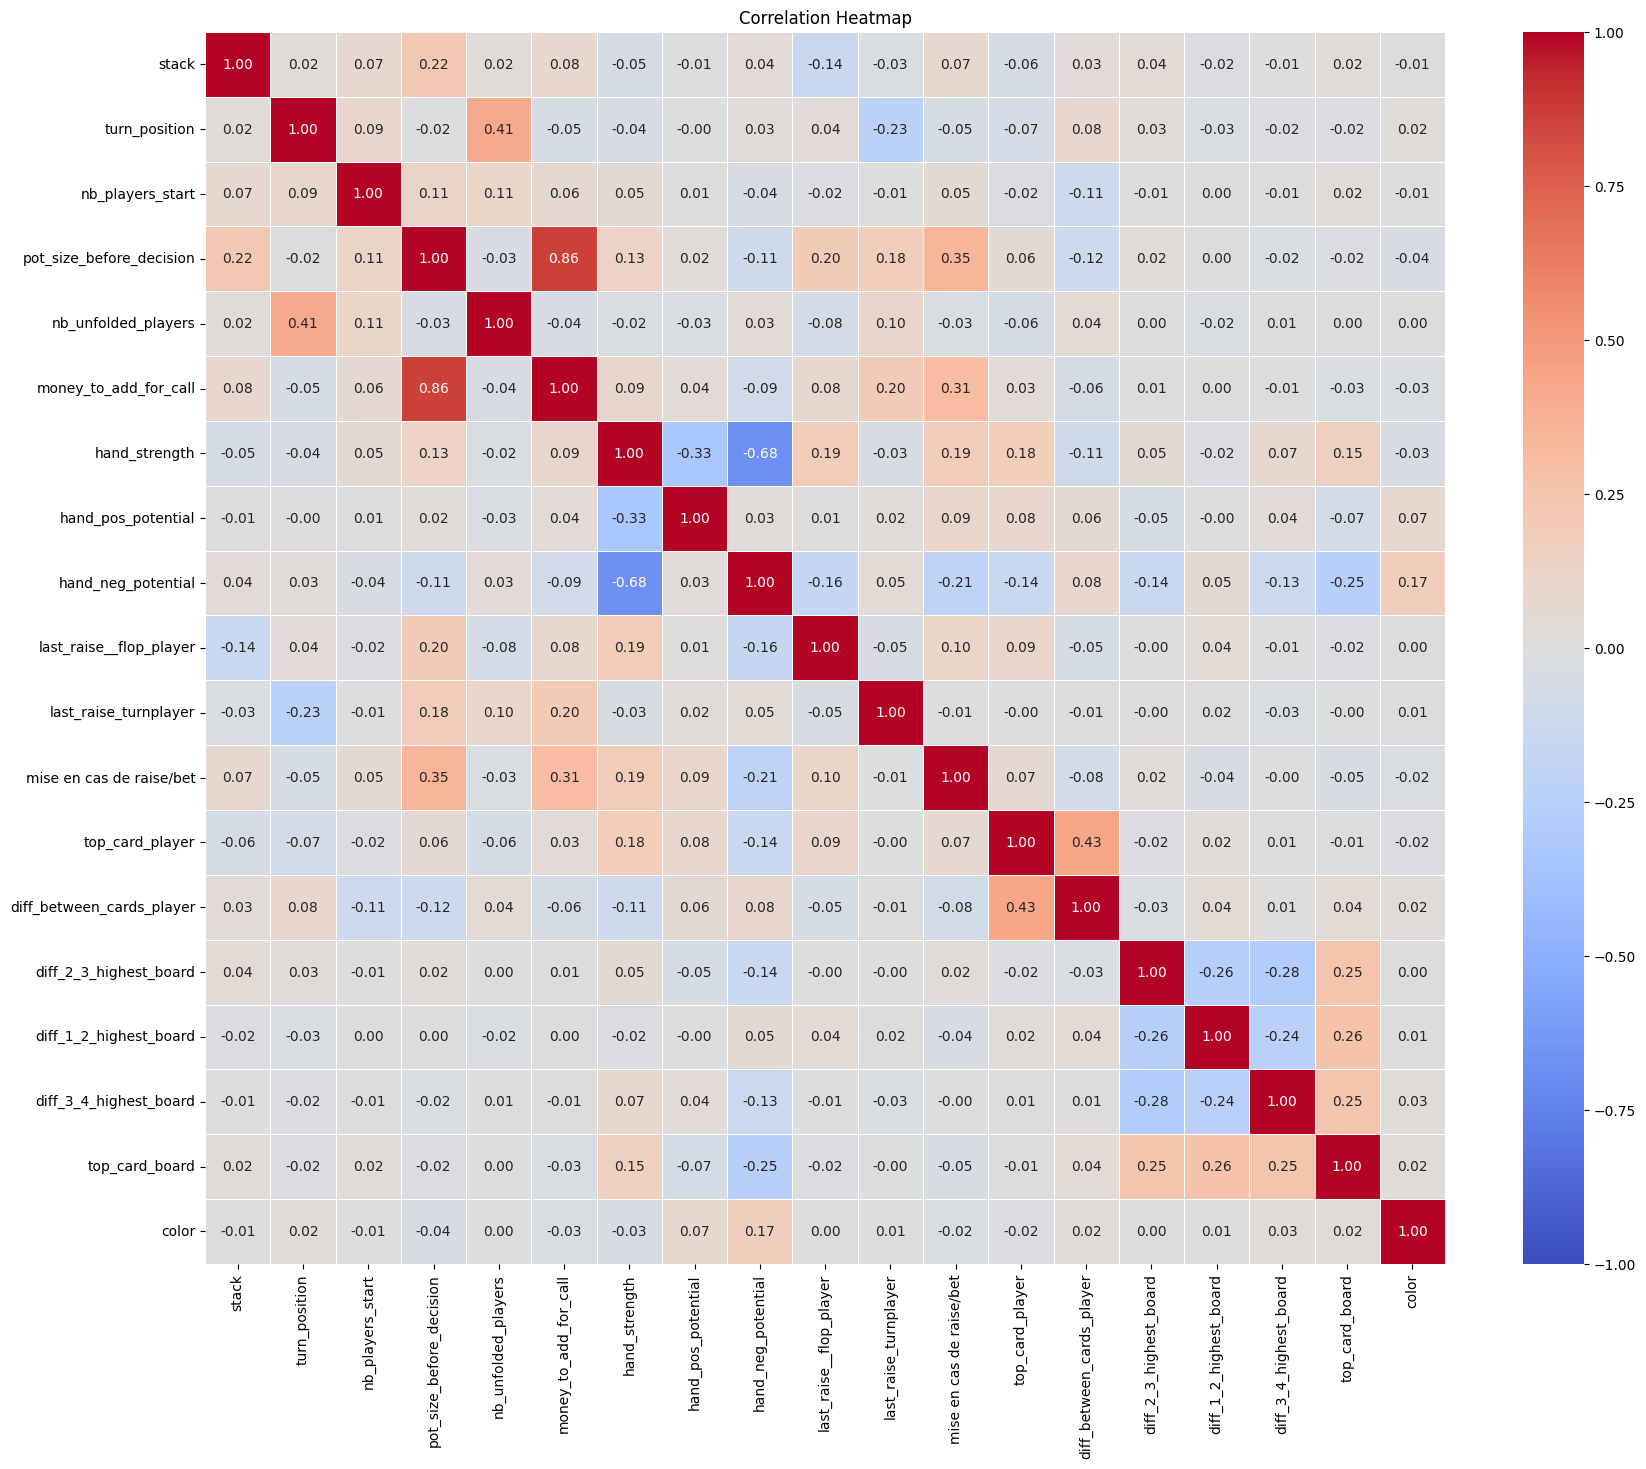

In [11]:
features = df.drop(columns=['game_id', 'decision', 'cards', 'flop', 'turn'])
M = features.corr()


plt.figure(figsize=(20, 16))
sns.heatmap(M, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Training
features = df.drop(columns=['game_id', 'decision', 'cards', 'flop', 'turn','mise en cas de raise/bet']).values.astype(np.float32)
labels = df['decision']
labels = labels.values.astype(np.float32)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state = 42)

model = Sequential(
    [
      tf.keras.Input(shape=(X_train.shape[1],)),
      Dense(units=64,activation='relu',name='layer1'),
      Dropout(0.2),
      Dense(units=64,activation='relu',name='layer2'),
      Dropout(0.2),
      Dense(units=64,activation='relu',name='layer3'),
      Dropout(0.2),
      Dense(units=3,activation='softmax',name='layer4')

    ], name = "turn_model3"
)


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

early_stopping = EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

history = model.fit(   X_train,Y_train,    epochs=1000, callbacks=[early_stopping], validation_data=(X_test, Y_test))

Epoch 1/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.4440 - loss: 1.6253 - val_accuracy: 0.5701 - val_loss: 1.0101
Epoch 2/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5067 - loss: 1.0736 - val_accuracy: 0.6172 - val_loss: 0.9036
Epoch 3/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5514 - loss: 0.9607 - val_accuracy: 0.6612 - val_loss: 0.8347
Epoch 4/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6349 - loss: 0.8861 - val_accuracy: 0.6837 - val_loss: 0.7073
Epoch 5/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6497 - loss: 0.7626 - val_accuracy: 0.6827 - val_loss: 0.6472
Epoch 6/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6792 - loss: 0.7341 - val_accuracy: 0.7267 - val_loss: 0.5794
Epoch 7/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7127 - loss: 0.6711 - val_accuracy: 0.7410 - val_loss: 0.5522
Epoch 8/1000
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7210 - loss: 0.6257 - val_accuracy: 0

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


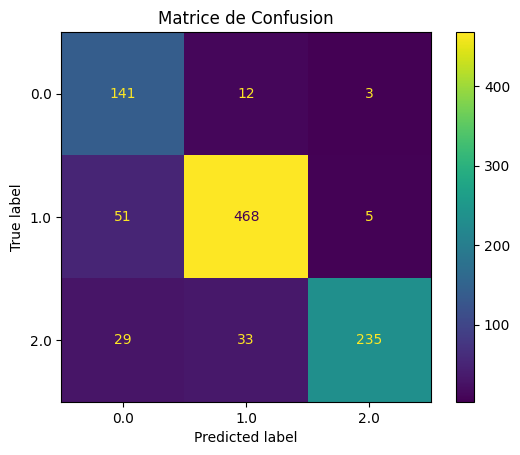

0.8403282149555108


In [13]:
y_true = Y_test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.title('Matrice de Confusion')
plt.show()

f1 = f1_score(y_true, y_pred, average='macro')
print(f1)

In [14]:
accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])
print(accuracy)
print(val_accuracy)

0.8873335719108582
0.8771750330924988


In [15]:
model.save('modele_turn_final.h5')



In [16]:
model.save('modele_turn_final.keras')
